In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = "C:\\Users\\Ufuk Altan\\Downloads\\Downloads\\Data Science\\PyFinance\\08 - Time series stock data\\"
fb = pd.read_csv(path + 'ticker-fb.csv', index_col = 0, parse_dates = True)
fb.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,181.580002,177.550003,177.679993,181.419998,18151900,181.419998
2018-01-03,184.779999,181.330002,181.880005,184.669998,16886600,184.669998
2018-01-04,186.210007,184.100006,184.899994,184.330002,13880900,184.330002
2018-01-05,186.899994,184.929993,185.589996,186.850006,13574500,186.850006
2018-01-08,188.899994,186.330002,187.199997,188.279999,17994700,188.279999


In [ ]:
# 12-26-9 vs 8-17-9

In [17]:
def macd(stock):
    exp1 = stock['Close'].ewm(span = 12, adjust = False).mean()
    exp2 = stock['Close'].ewm(span = 26, adjust = False).mean()
    macd_values = exp1 - exp2
    signal_line = macd_values.ewm(span = 9, adjust = False).mean()

    return macd_values, signal_line

In [18]:
fb['MACD'], fb['SignalLine'] = macd(fb)

In [4]:
fb.tail()

,High,Low,Open,Close,Volume,Adj Close,MACD,SignalLine
Date,,,,,,,,
2020-12-24,270.399994,266.200012,268.880005,267.399994,6702000,267.399994,-1.908274,-0.484116
2020-12-28,277.299988,265.660004,268.739990,277.000000,23299700,277.000000,-1.433083,-0.673909
2020-12-29,280.510010,276.279999,276.950012,276.779999,16383000,276.779999,-1.062002,-0.751528
2020-12-30,278.079987,271.709991,277.950012,271.869995,11803800,271.869995,-1.150847,-0.831391
2020-12-31,277.089996,269.809998,272.000000,273.160004,12892900,273.160004,-1.104433,-0.886000


<AxesSubplot:xlabel='Date'>

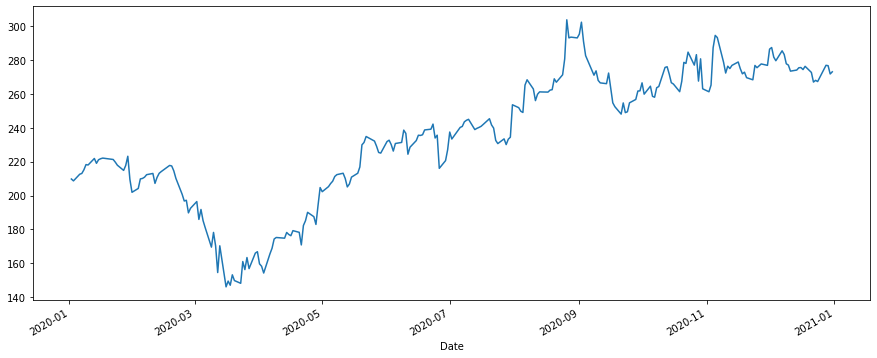

In [15]:
fb['Close'].loc['2020-01-01':].plot(figsize = (15,6))

<AxesSubplot:xlabel='Date'>

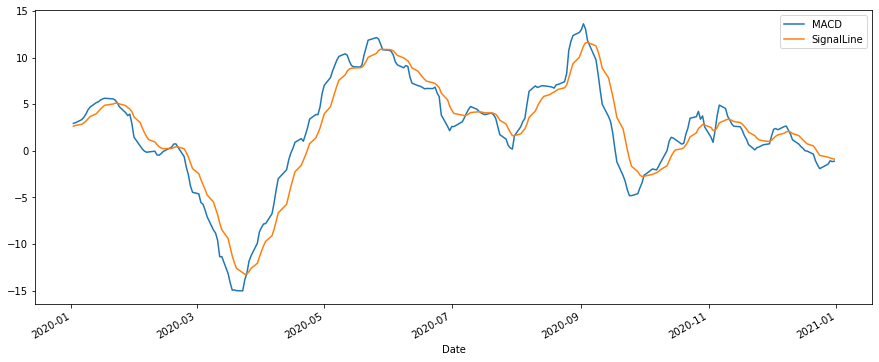

In [16]:
fb[['MACD', 'SignalLine']].loc['2020-01-01':].plot(figsize = (15,6))